# Pymaceuticals Inc.
---

### Analysis

Capomulin and Ramicane according to bar chart had the highest success in comparion to the other drugs used.

The sex of the mice were well divided and did not seem to decrese the success of the top ranking drugs Capomulin and Ramicane.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])
mouse_study_complete_sort = mouse_study_complete.sort_values(["Timepoint","Metastatic Sites"], ascending=True)
mouse_study_complete_sort = mouse_study_complete_sort.reset_index(drop=True)

# Display the data table for preview
mouse_study_complete_sort.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [13]:
# Checking the number of mice.
print(len(mouse_study_complete_sort["Mouse ID"].unique()))

249


In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatedDF = mouse_study_complete_sort[mouse_study_complete_sort.duplicated(["Mouse ID","Timepoint"], keep = False)]
duplicatedDF = duplicatedDF[duplicatedDF.duplicated()]
duplicatedDF = mouse_study_complete_sort[mouse_study_complete_sort.duplicated()]
x = np.array(duplicatedDF["Mouse ID"])
x


array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_dup_data = mouse_study_complete_sort.loc[mouse_study_complete_sort["Mouse ID"] == x[0]]


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_complete_clean = mouse_study_complete_sort.loc[(mouse_study_complete_sort["Mouse ID"] != x[0])]

In [17]:
# Checking the number of mice in the clean DataFrame.
num_of_mice = len(mouse_study_complete_clean["Mouse ID"].unique())
print(num_of_mice)

248


## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_vol = mouse_study_complete_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_vol = mouse_study_complete_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor_vol = mouse_study_complete_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_var_tumor_vol = mouse_study_complete_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor_vol = mouse_study_complete_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
#print(mouse_study_complete_clean.groupby(["Drug Regimen"]))

summary_stats = pd.DataFrame({
                             "Mean Tumor Volume": mean_tumor_vol,
                             "Median Tumor Variance": median_tumor_vol,
                             "Tumor Volume Variance": variance_tumor_vol,
                             "Tumor Volume Std.Dev.": std_var_tumor_vol,
                             "Tumor Volume Std. Err.": sem_tumor_vol
                             })

summary_stats


,Mean Tumor Volume,Median Tumor Variance,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
mouse_study_complete_clean.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":[np.mean,np.median,np.var,np.std,st.sem]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

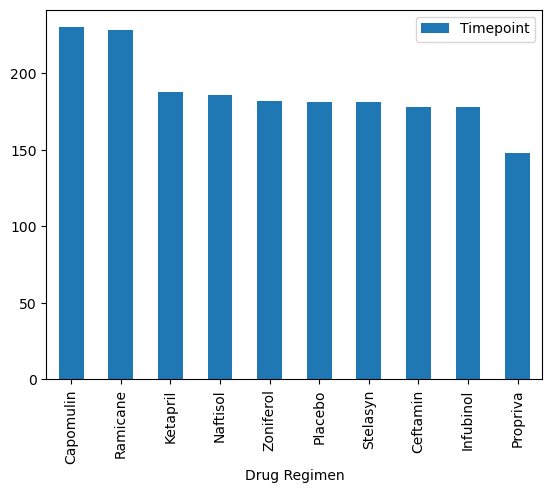

In [21]:
#Pandas
tpoints = mouse_study_complete_clean.groupby(["Drug Regimen"], as_index = False)["Timepoint"].count()
tpoints = tpoints.sort_values(["Timepoint"],ascending = False)
tpoints
tpoints.plot.bar(x='Drug Regimen',rot=90)

<function matplotlib.pyplot.show(close=None, block=None)>

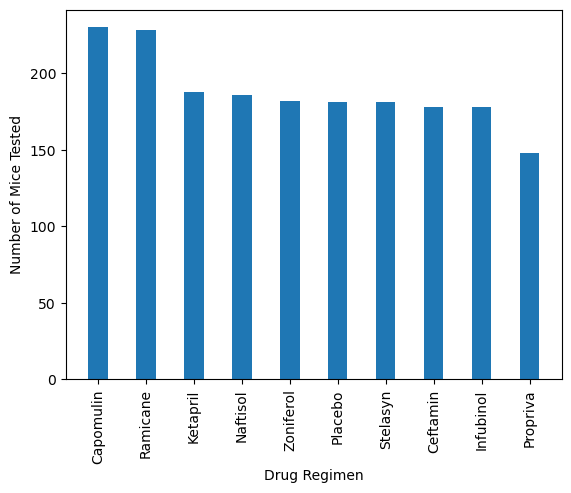

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tpoints = mouse_study_complete_clean.groupby(["Drug Regimen"], as_index = False)["Timepoint"].count()
tpoints = tpoints.sort_values(["Timepoint"],ascending = False)
tpoints
x_axis = np.arange(len(tpoints))
tick_locations = [value+0.4 for value in x_axis]
plt.tight_layout()


plt.bar(tick_locations,tpoints["Timepoint"], align="center", width=.4)

plt.xticks(tick_locations, tpoints["Drug Regimen"],rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show

<AxesSubplot:>

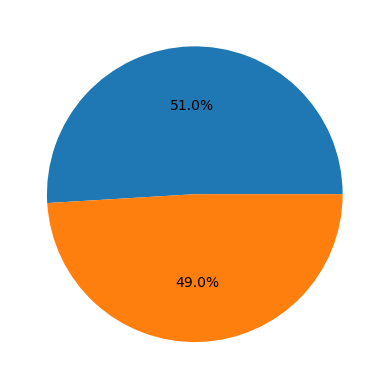

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female =mouse_study_complete_clean.groupby(["Sex"],as_index = False)['Mouse ID'].count()
male_female.sort_values("Mouse ID", ascending=False).plot.pie(y='Mouse ID', autopct='%1.1f%%', labels=None, legend=None, ylabel="")


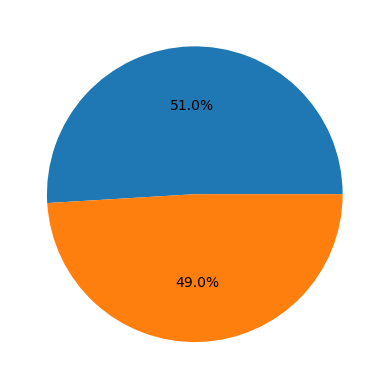

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sorted(male_female["Mouse ID"],reverse=True),autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
gtp_mouse = mouse_study_complete_clean.groupby(["Mouse ID"])["Timepoint"].max()
gtp_mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
gtp_mouse_merge = pd.merge(gtp_mouse,mouse_study_complete_clean,on="Mouse ID")
gtp_mouse_merge


,Mouse ID,Timepoint_x,Timepoint_y,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,0,45.000000,0,Infubinol,Female,20,23
1,a203,45,5,48.508468,0,Infubinol,Female,20,23
2,a203,45,10,51.852437,1,Infubinol,Female,20,23
3,a203,45,15,52.777870,1,Infubinol,Female,20,23
4,a203,45,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...,...
1875,z969,45,25,63.145652,2,Naftisol,Male,9,30
1876,z969,45,30,65.841013,3,Naftisol,Male,9,30
1877,z969,45,35,69.176246,4,Naftisol,Male,9,30
1878,z969,45,40,70.314904,4,Naftisol,Male,9,30


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treat_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol  = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

 # Locate the rows which contain mice on each drug and get the tumor volumes
for mouse_drug in treat_list:

    #Creating subset dataframe for the isolated drugs used.
    tumor_vol_df = gtp_mouse_merge.loc[gtp_mouse_merge["Drug Regimen"] == mouse_drug]
    
    #Filter down to just the final Timepoint
    tumor_vol_df_tp = tumor_vol_df.loc[tumor_vol_df["Timepoint_x"] == tumor_vol_df["Timepoint_y"]]
    
    #Getting the tumor values and sorting them for the quantiles.
    tumor_values = tumor_vol_df_tp["Tumor Volume (mm3)"].sort_values()

    #Adding the values to the empty list.
    tumor_vol.append(tumor_values)

    #Determine outliers using upper and lower bournds.

    #Creating the quartiles using the dataframe quantile
    quartiles = tumor_values.quantile([.25,.5,.75])
    low_q = quartiles[0.25]
    upp_q = quartiles[0.75]
    #Calculating the interquartile range (IQR).
    iqr = upp_q - low_q

    #Printing out IQR and calculating the upper and lower bounds.
    print(f"The interquartile range (IQR) for {mouse_drug} is {iqr}")
    lower_bound = low_q - (1.5*iqr)
    upper_bound = upp_q + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The interquartile range (IQR) for Capomulin is 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The interquartile range (IQR) for Ramicane is 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The interquartile range (IQR) for Infubinol is 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The interquartile range (IQR) for Ceftamin is 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


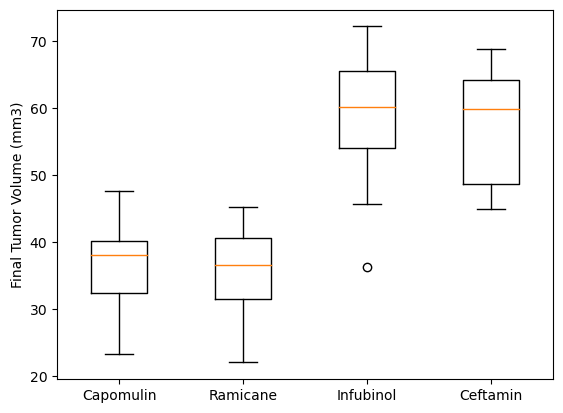

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1,ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.xticks([1,2,3,4],[drug for drug in treat_list])
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse y793')

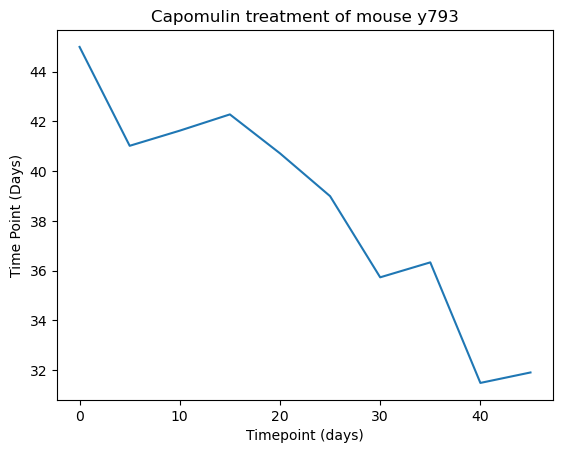

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Find mice treated with Capomulin
mouse_id = gtp_mouse_merge.loc[gtp_mouse_merge["Mouse ID"] == "y793"]
#Use Timepoints for mouse from dataframe use as x-axis
x = mouse_id["Timepoint_y"]
#Use Tumor Volume (mm3) from dataframe as y-axis
y = mouse_id["Tumor Volume (mm3)"]
plt.plot(x,y)
plt.xlabel('Timepoint (days)')
plt.ylabel('Time Point (Days)')
plt.title("Capomulin treatment of mouse y793")



In [102]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



<bound method Series.count of Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64>
<bound method Series.count of 174     22
175     22
176     22
177     22
178     22
        ..
1818    17
1819    17
1820    17
1821    17
1822    17
Name: Weight (g), Length: 230, dtype: int64>


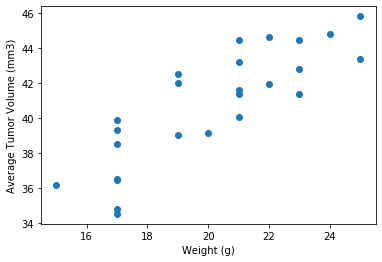

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = gtp_mouse_merge["Weight (g)"]



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


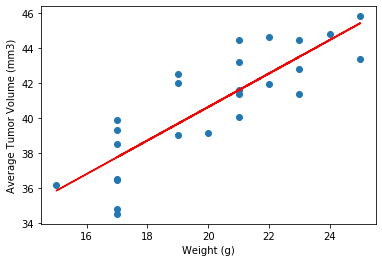

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

